In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
sns.set_style('darkgrid')
file_path = '../data/fashion-dataset/styles.csv'

In [5]:
try:
    df = pd.read_csv(file_path, on_bad_lines='skip')
    print("Veri seti başarıyla yüklendi!")
    print(f"Dataset boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")
except FileNotFoundError:
    print(f"HATA: Belirtilen yolda dosya bulunamadı: {file_path}")
    print("Lütfen dosya yolunuzu ve proje yapınızı kontrol edin.")

Veri seti başarıyla yüklendi!
Dataset boyutu: 44424 satır, 10 sütun


In [7]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [9]:
df.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [10]:
df.describe(include=['object'])

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,44424,44424,44424,44424,44409,44403,44107,44417
unique,5,7,45,143,46,4,8,31121
top,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,22147,21397,15402,7067,9728,21472,34406,82


In [11]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data_summary = pd.DataFrame({'Eksik Değer Sayısı': missing_values, 'Eksik Değer Yüzdesi': missing_percentage})
print("Sütunlardaki eksik veri özeti:")
print(missing_data_summary.sort_values(by='Eksik Değer Yüzdesi', ascending=False))

Sütunlardaki eksik veri özeti:
                    Eksik Değer Sayısı  Eksik Değer Yüzdesi
usage                              317             0.713578
season                              21             0.047272
baseColour                          15             0.033766
productDisplayName                   7             0.015757
year                                 1             0.002251
id                                   0             0.000000
gender                               0             0.000000
articleType                          0             0.000000
masterCategory                       0             0.000000
subCategory                          0             0.000000


In [12]:
df['usage'].fillna('Not Specified', inplace=True)

C:\Users\borao\AppData\Local\Temp\ipykernel_10452\979162399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['usage'].fillna('Not Specified', inplace=True)


In [13]:
df['year'].value_counts().sort_index()

year
2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13672
2012.0    16288
2013.0     1212
2014.0      236
2015.0     2780
2016.0     6006
2017.0     2916
2018.0      405
2019.0       33
Name: count, dtype: int64

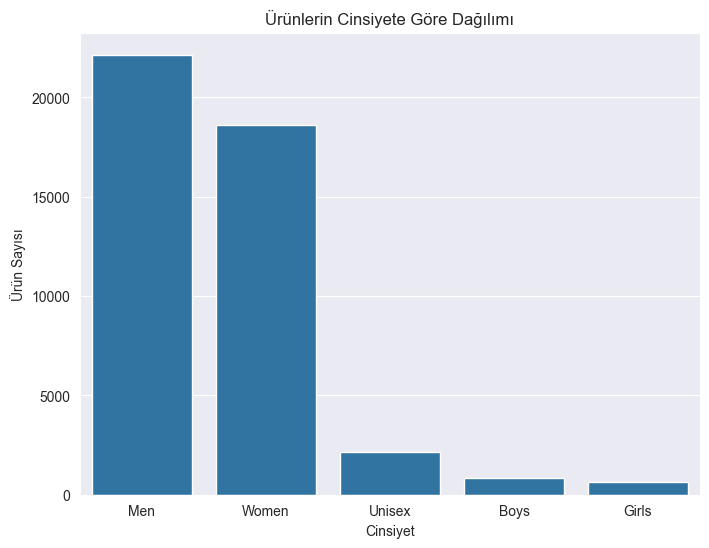

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, order=df['gender'].value_counts().index)
plt.title('Ürünlerin Cinsiyete Göre Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Ürün Sayısı')
plt.show()

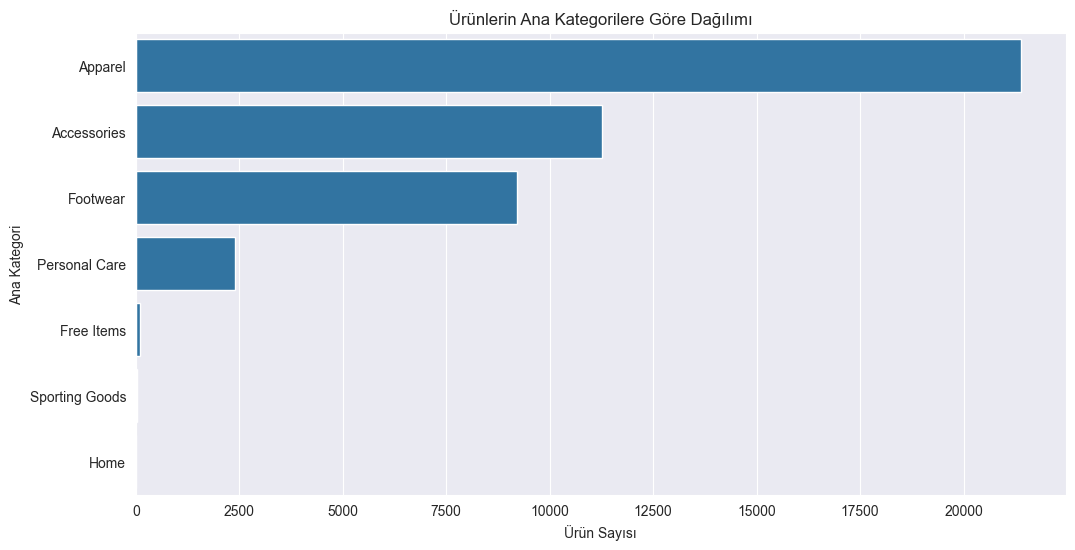

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(y='masterCategory', data=df, order=df['masterCategory'].value_counts().index)
plt.title('Ürünlerin Ana Kategorilere Göre Dağılımı')
plt.xlabel('Ürün Sayısı')
plt.ylabel('Ana Kategori')
plt.show()

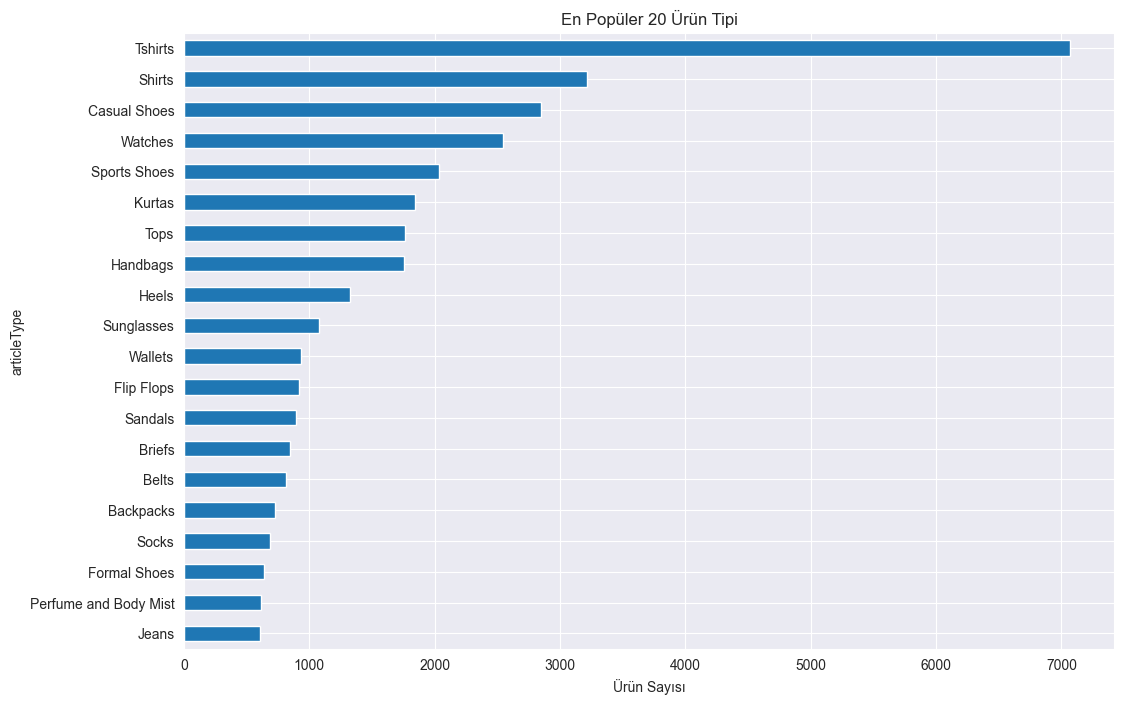

In [16]:
plt.figure(figsize=(12, 8))
df['articleType'].value_counts().head(20).plot(kind='barh')
plt.title('En Popüler 20 Ürün Tipi')
plt.xlabel('Ürün Sayısı')
plt.gca().invert_yaxis() # En popüler olan en üstte görünsün
plt.show()

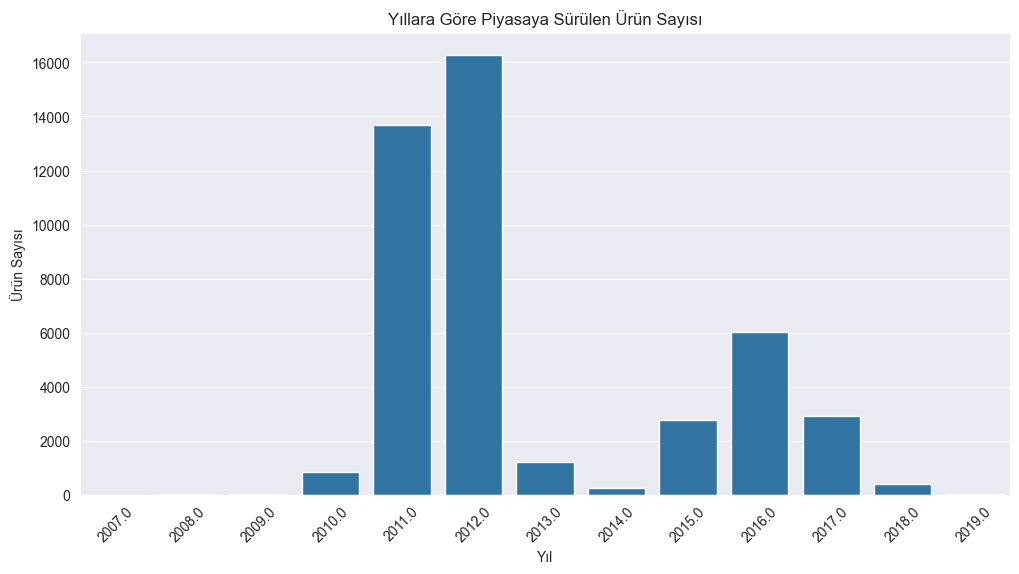

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, order=df['year'].value_counts().sort_index().index)
plt.title('Yıllara Göre Piyasaya Sürülen Ürün Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=45)
plt.show()

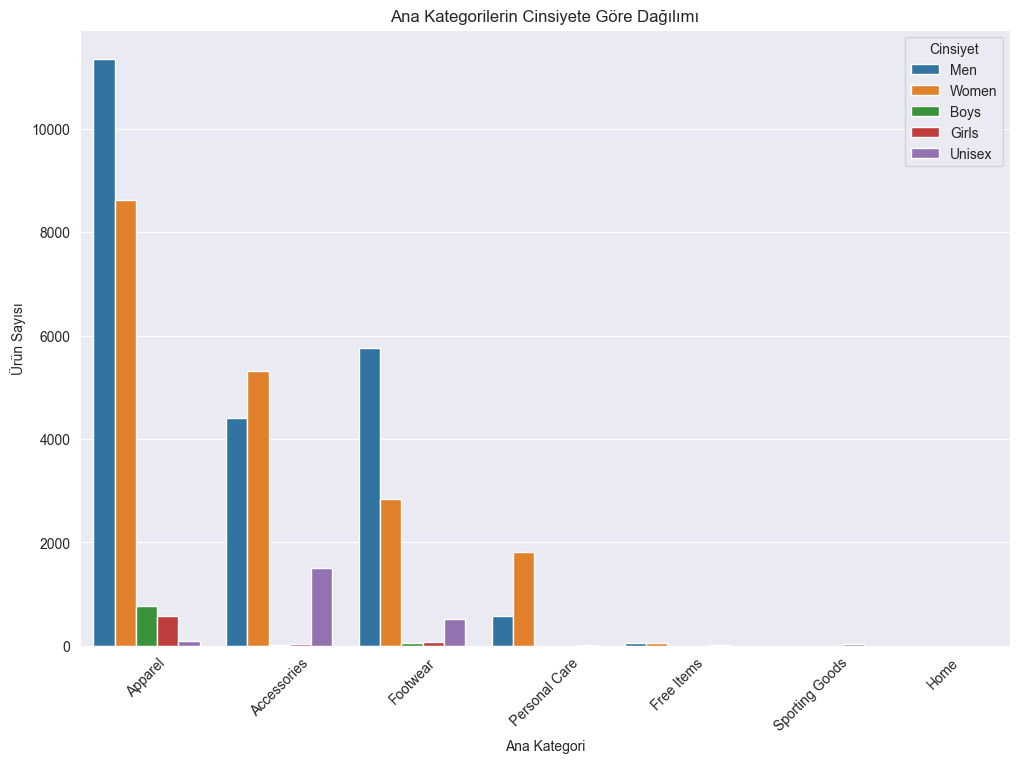

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(x='masterCategory', hue='gender', data=df)
plt.title('Ana Kategorilerin Cinsiyete Göre Dağılımı')
plt.xlabel('Ana Kategori')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Cinsiyet')
plt.show()

C:\Users\borao\AppData\Local\Temp\ipykernel_10452\861859199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['season'].fillna('Not Specified', inplace=True)


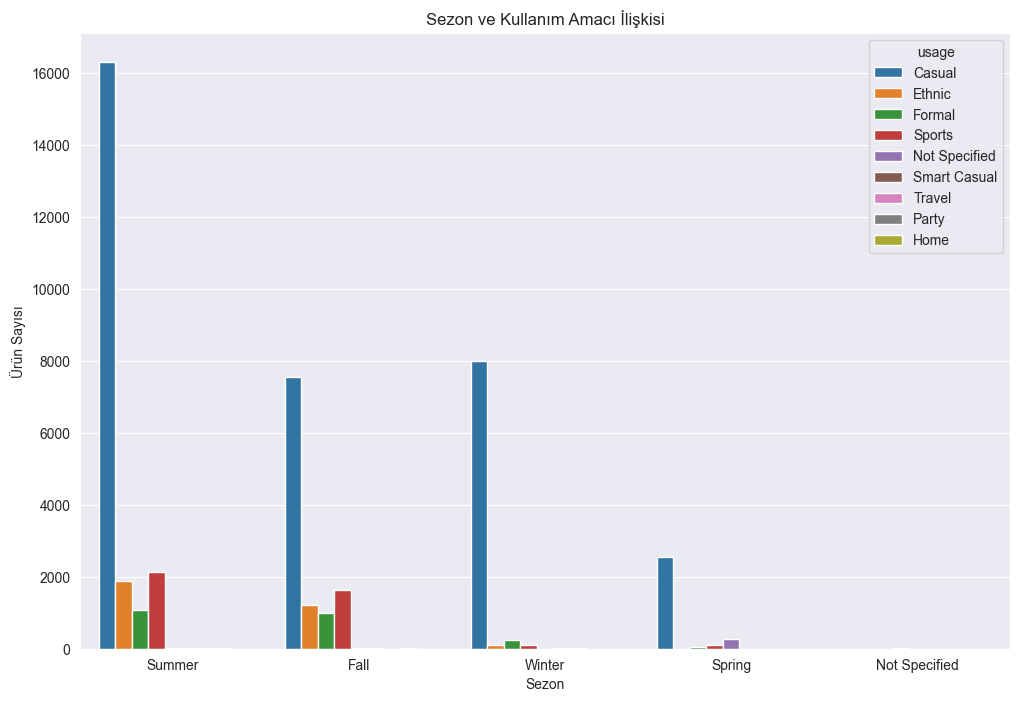

In [19]:
# 'season' sütunundaki null değerleri de dolduralım
df['season'].fillna('Not Specified', inplace=True)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='season', hue='usage', order=df['season'].value_counts().index)
plt.title('Sezon ve Kullanım Amacı İlişkisi')
plt.xlabel('Sezon')
plt.ylabel('Ürün Sayısı')
plt.show()

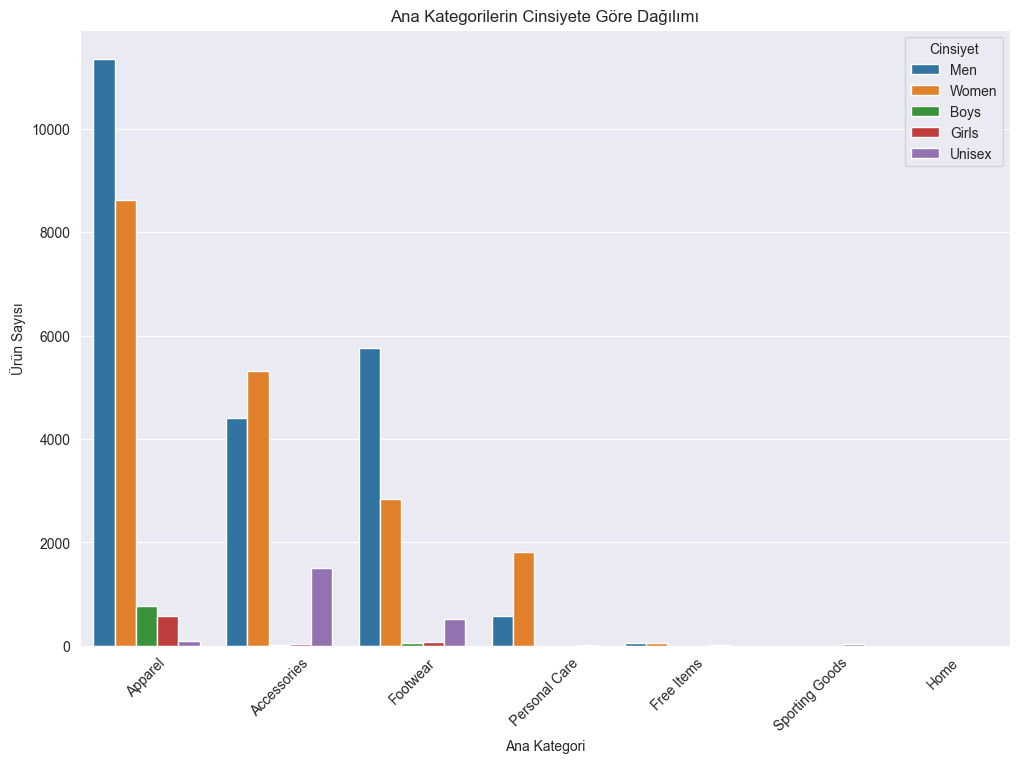

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x='masterCategory', hue='gender', data=df)
plt.title('Ana Kategorilerin Cinsiyete Göre Dağılımı')
plt.xlabel('Ana Kategori')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Cinsiyet')
plt.show()

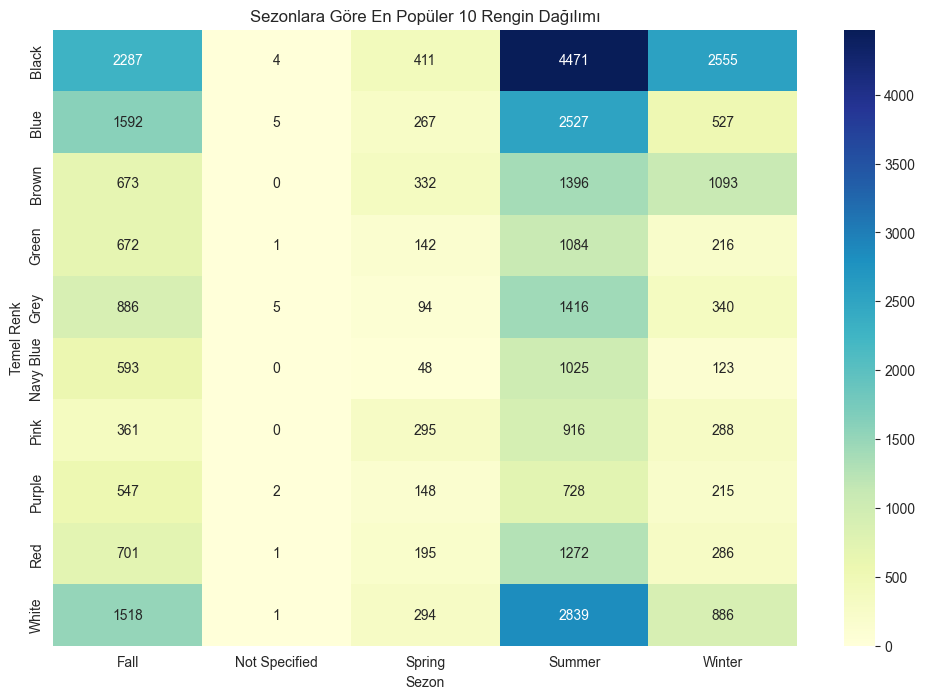

In [21]:
# Önce 'season' içindeki eksik verileri de dolduralım
df['season'].fillna('Not Specified', inplace=True)

# Renk ve sezon arasında bir çapraz tablo oluşturalım
# Sadece en popüler 10 rengi alalım ki grafik okunabilir olsun
top_10_colours = df['baseColour'].value_counts().head(10).index
df_top_colours = df[df['baseColour'].isin(top_10_colours)]

colour_season_crosstab = pd.crosstab(df_top_colours['baseColour'], df_top_colours['season'])

# Şimdi ısı haritasını çizelim
plt.figure(figsize=(12, 8))
sns.heatmap(colour_season_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sezonlara Göre En Popüler 10 Rengin Dağılımı')
plt.xlabel('Sezon')
plt.ylabel('Temel Renk')
plt.show()

In [22]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 328.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 403.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.2 kB 409.6 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 525.1 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.2 kB 626.9 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/301.2 kB 577.6 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 689.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


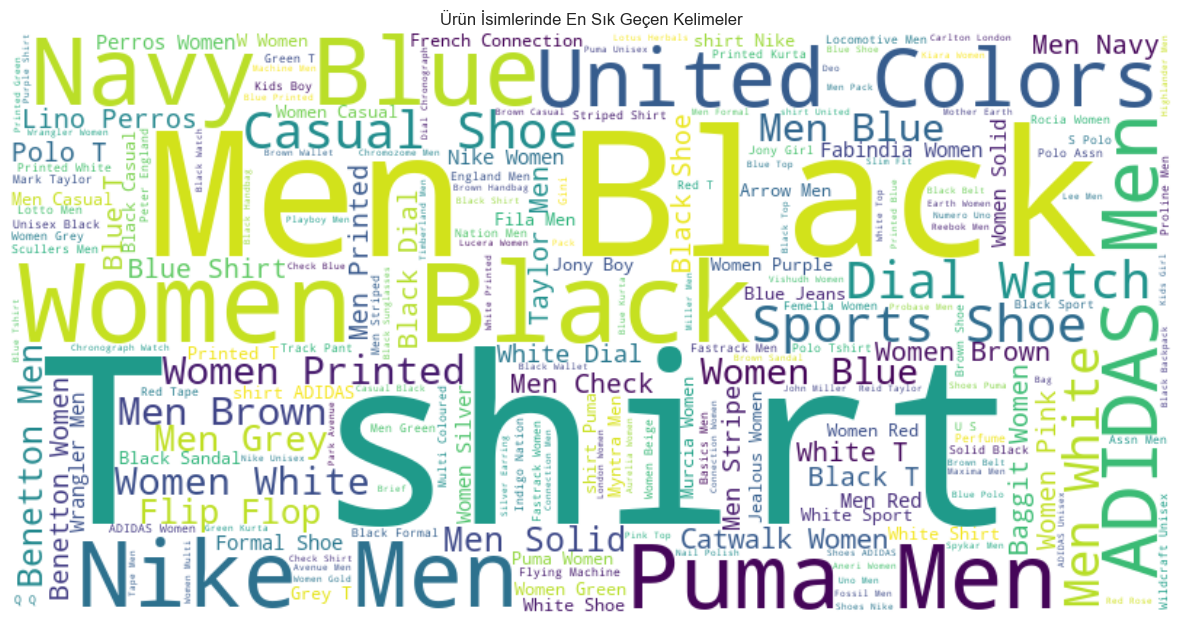

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NaN değerleri temizleyelim ve tüm metni birleştirelim
# productDisplayName sütunundaki tüm satırları birleştirerek tek bir metin oluşturuyoruz.
text = " ".join(review for review in df.productDisplayName.astype(str) if review != 'nan')

# Kelime bulutu oluşturalım
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Görselleştirelim
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ürün İsimlerinde En Sık Geçen Kelimeler")
plt.show()

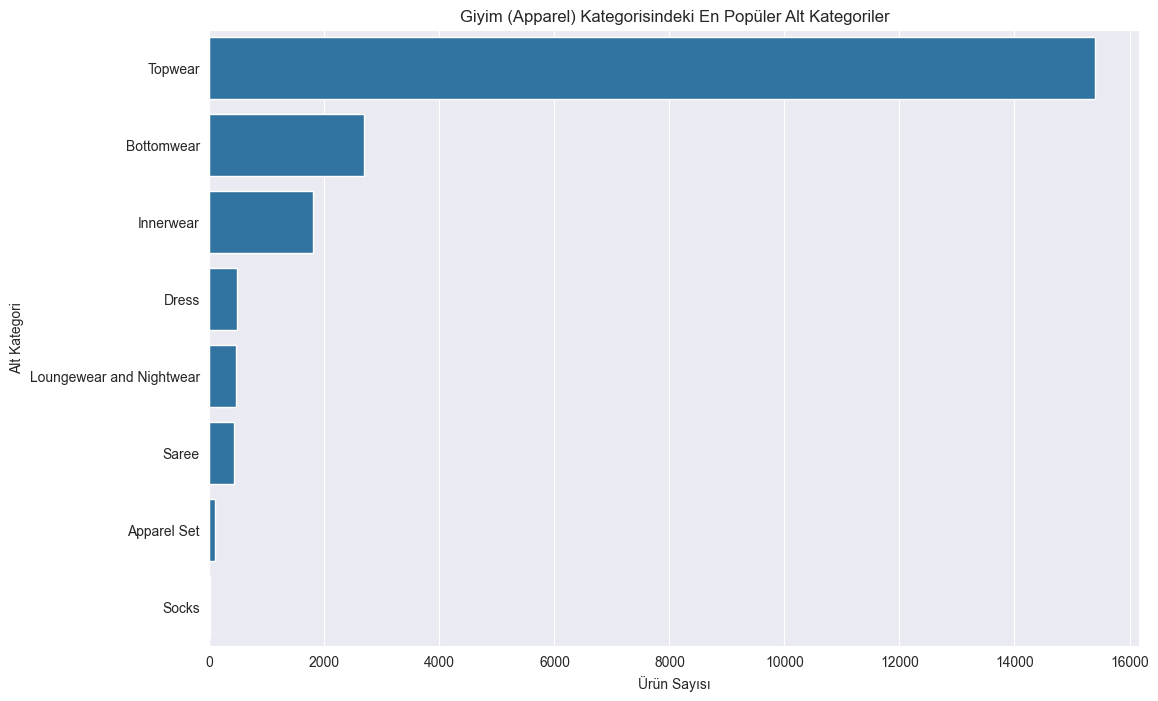

In [24]:
import seaborn as sns

# Sadece 'Apparel' ana kategorisine ait verileri filtreleyelim
df_apparel = df[df['masterCategory'] == 'Apparel']

plt.figure(figsize=(12, 8))
sns.countplot(y='subCategory', data=df_apparel, order=df_apparel['subCategory'].value_counts().index)
plt.title('Giyim (Apparel) Kategorisindeki En Popüler Alt Kategoriler')
plt.xlabel('Ürün Sayısı')
plt.ylabel('Alt Kategori')
plt.show()